In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'superstore.csv')

In [2]:
#checking data types
for row in df:
    print(row+":", df[row].dtype)

Row ID: int64
Order ID: object
Order Date: object
Ship Date: object
Ship Mode: object
Customer ID: object
Customer Name: object
Segment: object
Country: object
City: object
State: object
Postal Code: int64
Region: object
Product ID: object
Category: object
Sub-Category: object
Product Name: object
Sales: float64
Quantity: int64
Discount: float64
Profit: float64


In [3]:
#Converts date values to date time datatype

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Order Date"])

for row in df:
    print(row+":", df[row].dtype)

Row ID: int64
Order ID: object
Order Date: datetime64[ns]
Ship Date: datetime64[ns]
Ship Mode: object
Customer ID: object
Customer Name: object
Segment: object
Country: object
City: object
State: object
Postal Code: int64
Region: object
Product ID: object
Category: object
Sub-Category: object
Product Name: object
Sales: float64
Quantity: int64
Discount: float64
Profit: float64


In [4]:
##Sort values by order date
df = df.sort_values(by='Order Date')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-05,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
#check for missing data points
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
df.corr(method = 'pearson')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:xlabel='Category', ylabel='Segment'>

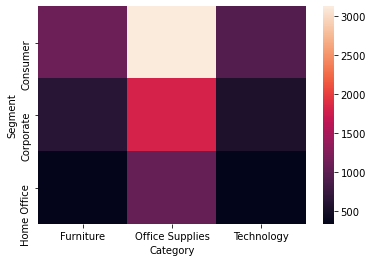

In [7]:
sns.heatmap(pd.crosstab(df["Segment"], df["Category"]))

<AxesSubplot:title={'center':'Profit versus Revenue'}, xlabel='Profit', ylabel='Sales'>

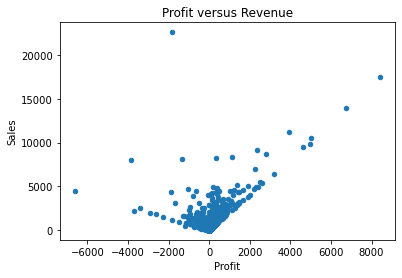

In [8]:
df.plot.scatter(x = "Profit", y = "Sales", title = "Profit versus Revenue")

In [9]:
#find distinct buyer types
buyer_types = df.Segment.unique()
        
buyer_types     

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

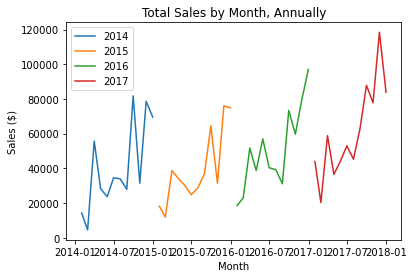

In [10]:
df_byYear = df.groupby(df["Order Date"].dt.year)
df_2014 = df_byYear.get_group(2014)
df_2015 = df_byYear.get_group(2015)
df_2016 = df_byYear.get_group(2016)
df_2017 = df_byYear.get_group(2017)


df_2014_byM = df_2014.groupby(pd.Grouper(key='Order Date',freq='M')).sum()
df_2015_byM = df_2015.groupby(pd.Grouper(key='Order Date',freq='M')).sum()
df_2016_byM = df_2016.groupby(pd.Grouper(key='Order Date',freq='M')).sum()
df_2017_byM = df_2017.groupby(pd.Grouper(key='Order Date',freq='M')).sum()


df_2014_sales_byM = pd.DataFrame({
    "Sales" : df_2014_byM["Sales"]
})
df_2015_sales_byM = pd.DataFrame({
    "Sales" : df_2015_byM["Sales"]
})
df_2016_sales_byM = pd.DataFrame({
    "Sales" : df_2016_byM["Sales"]
})
df_2017_sales_byM = pd.DataFrame({
    "Sales" : df_2017_byM["Sales"]
})



plt.plot(df_2014_sales_byM)
plt.plot(df_2015_sales_byM)
plt.plot(df_2016_sales_byM)
plt.plot(df_2017_sales_byM)
plt.title("Total Sales by Month, Annually")
plt.legend(["2014", "2015", "2016", "2017"])
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()


In [11]:
df_2014_sales_byM.to_csv(r'2014_sales.csv')
df_2015_sales_byM.to_csv(r'2015_sales.csv')
df_2016_sales_byM.to_csv(r'2016_sales.csv')
df_2017_sales_byM.to_csv(r'2017_sales.csv')

In [12]:
# Create new data frames grouped by segment

df_segment_grouped = df.groupby(df.Segment)
df_consumer = df_segment_grouped.get_group("Consumer")
df_corporate = df_segment_grouped.get_group("Corporate")
df_home = df_segment_grouped.get_group("Home Office")
segment_list = [df_consumer, df_corporate, df_home]
display(df_consumer.head())
display(df_corporate.head())
display(df_home.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1759,1760,CA-2014-141817,2014-01-05,2014-01-05,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
5327,5328,CA-2014-130813,2014-01-06,2014-01-06,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
7660,7661,CA-2014-105417,2014-01-07,2014-01-07,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
7661,7662,CA-2014-105417,2014-01-07,2014-01-07,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.430,7,0.8,-18.2525


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7180,7181,CA-2014-106054,2014-01-06,2014-01-06,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.78,3,0.0,5.2398
866,867,CA-2014-149020,2014-01-10,2014-01-10,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.94,1,0.0,21.2954
865,866,CA-2014-149020,2014-01-10,2014-01-10,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,OFF-LA-10004272,Office Supplies,Labels,Avery 482,2.89,1,0.0,1.3583
767,768,CA-2014-162775,2014-01-13,2014-01-13,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,OFF-ST-10000025,Office Supplies,Storage,Fellowes Stor/Drawer Steel Plus Storage Drawers,572.58,6,0.0,34.3548
766,767,CA-2014-162775,2014-01-13,2014-01-13,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,OFF-BI-10004187,Office Supplies,Binders,3-ring staple pack,5.64,3,0.0,2.7072


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
739,740,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
7476,7477,CA-2014-167199,2014-01-06,2014-01-06,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.480,2,0.0,1.4796
7474,7475,CA-2014-167199,2014-01-06,2014-01-06,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078


In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<AxesSubplot:xlabel='buyer_type'>

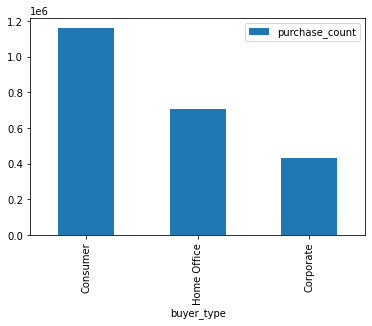

In [46]:
#plot sales values for buyer types
consumer_sales = df_consumer["Sales"].sum()
corporate_sales = df_corporate["Sales"].sum()
home_sales = df_home["Sales"].sum()

sales_count = [consumer_sales, corporate_sales, home_sales]

segment_df = pd.DataFrame({ 
    'buyer_type' : buyer_types,
    'purchase_count' : sales_count})

segment_df.plot.bar(x='buyer_type', y = 'purchase_count')


In [15]:
df_consumer_sales= pd.DataFrame({ 
    'Order Date' : df_consumer["Order Date"],
    'Sales' : df_consumer["Sales"],
    'Profit' : df_consumer["Profit"]})
df_corporate_sales= pd.DataFrame({ 
    'Order Date' : df_corporate["Order Date"],
    'Sales' : df_corporate["Sales"],
    'Profit' : df_corporate["Profit"]})
df_home_sales= pd.DataFrame({ 
    'Order Date' : df_home["Order Date"],
    'Sales' : df_home["Sales"],
    'Profit' : df_home["Profit"]})


consumer_agg_sales = pd.pivot_table(data = df_consumer_sales, index = df_consumer_sales["Order Date"], aggfunc=np.sum)
corporate_agg_sales = pd.pivot_table(data = df_corporate_sales, index = df_corporate_sales["Order Date"], aggfunc=np.sum)
home_agg_sales = pd.pivot_table(data = df_home_sales, index = df_home_sales["Order Date"], aggfunc=np.sum)

display(consumer_agg_sales.describe())
display(corporate_agg_sales.describe())
display(home_agg_sales.describe())
display(np.var(consumer_agg_sales))
display(np.var(corporate_agg_sales))
display(np.var(home_agg_sales))

,Profit,Sales
count,1044.000000,1044.000000
mean,128.466675,1112.453396
std,553.731133,1604.477511
min,-6835.138400,1.112000
25%,3.224475,159.664000
50%,43.739900,570.768500
75%,182.788000,1366.237000
max,6713.689200,14221.888000


,Profit,Sales
count,830.000000,830.000000
mean,110.818234,850.778755
std,475.456461,1357.646636
min,-3948.306900,0.836000
25%,3.894375,106.000000
50%,34.949700,391.125000
75%,141.643675,1063.659000
max,8778.977900,18398.180000


,Profit,Sales
count,610.000000,610.000000
mean,98.850293,704.349424
std,391.120023,1570.370607
min,-3424.354600,1.810000
25%,3.502300,64.544000
50%,25.106900,257.552000
75%,113.146825,786.485500
max,4609.190900,28106.716000


Profit    3.063245e+05
Sales     2.571882e+06
dtype: float64

Profit    2.257865e+05
Sales     1.840984e+06
dtype: float64

Profit    1.527241e+05
Sales     2.462021e+06
dtype: float64

In [16]:
def detect_outliers(df, col):
    outliers_index = []
    mean = np.mean(df[col])
    std = np.std(df[col])
    for i in range(df[col].size):
        z_score = (df[col][i]-mean)/std
        if (np.abs(z_score) > 3):
            outliers_index.append(i)
    return outliers_index

consumer_sales_outliers = detect_outliers(consumer_agg_sales, "Sales")
consumer_profit_outliers = detect_outliers(consumer_agg_sales, "Profit")
corporate_sales_outliers = detect_outliers(corporate_agg_sales, "Sales")
corporate_profit_outliers = detect_outliers(corporate_agg_sales, "Profit")
home_sales_outliers = detect_outliers(home_agg_sales, "Sales")
home_profit_outliers = detect_outliers(home_agg_sales, "Profit")

con_sales_med = np.median(consumer_agg_sales["Sales"])
con_profit_med = np.median(consumer_agg_sales["Profit"])
cor_sales_med = np.median(corporate_agg_sales["Sales"])
cor_profit_med = np.median(corporate_agg_sales["Profit"])
hom_sales_med = np.median(home_agg_sales["Sales"])
hom_profit_med = np.median(home_agg_sales["Profit"])

def replace_outliers(df, col, indicies, med):
    for i in range(df[col].size):
        if i in indicies:
            df[col][i] = med
    
    return df

consumer_agg_sales = replace_outliers(consumer_agg_sales, "Sales", consumer_sales_outliers, con_sales_med)
consumer_agg_sales = replace_outliers(consumer_agg_sales, "Profit", consumer_profit_outliers, con_profit_med)
corporate_agg_sales = replace_outliers(corporate_agg_sales, "Sales", corporate_sales_outliers, cor_sales_med)
corporate_agg_sales = replace_outliers(corporate_agg_sales, "Profit", corporate_profit_outliers, cor_profit_med)
home_agg_sales = replace_outliers(home_agg_sales, "Sales", home_sales_outliers, hom_sales_med)
home_agg_sales = replace_outliers(home_agg_sales, "Profit", home_profit_outliers, hom_profit_med)

display(np.var(consumer_agg_sales))
display(np.var(corporate_agg_sales))
display(np.var(home_agg_sales))

Profit    8.511230e+04
Sales     1.258196e+06
dtype: float64

Profit     64920.358443
Sales     844684.951429
dtype: float64

Profit     49364.933134
Sales     764397.509341
dtype: float64

In [28]:
consumer_agg_sales.to_csv(r'consumer.csv')
corporate_agg_sales.to_csv(r'corporate.csv')
home_agg_sales.to_csv(r'home.csv')

In [18]:
consumer_agg_sales_byQ = consumer_agg_sales.groupby(pd.Grouper(level='Order Date',freq='Q')).mean()
corporate_agg_sales_byQ = corporate_agg_sales.groupby(pd.Grouper(level='Order Date',freq='Q')).mean()
home_agg_sales_byQ = home_agg_sales.groupby(pd.Grouper(level='Order Date',freq='Q')).mean()

display(consumer_agg_sales_byQ.head())
display(corporate_agg_sales_byQ.head())
display(home_agg_sales_byQ.head())

,Profit,Sales
Order Date,,
2014-03-31,36.477853,430.685784
2014-06-30,87.553430,784.451190
2014-09-30,137.358364,1024.528516
2014-12-31,87.966437,1142.733296
2015-03-31,91.146523,801.162793


,Profit,Sales
Order Date,,
2014-03-31,37.650620,559.679800
2014-06-30,85.948756,664.503488
2014-09-30,52.121772,534.859880
2014-12-31,96.149609,809.040727
2015-03-31,46.559997,636.563983


,Profit,Sales
Order Date,,
2014-03-31,-18.163618,625.980118
2014-06-30,89.977346,440.099769
2014-09-30,57.530568,427.560347
2014-12-31,104.229920,631.133500
2015-03-31,20.244879,400.650543


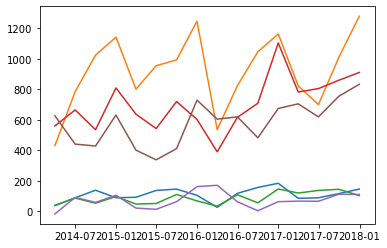

In [19]:
plt.plot(consumer_agg_sales_byQ)
plt.plot(corporate_agg_sales_byQ)
plt.plot(home_agg_sales_byQ)
plt.show()

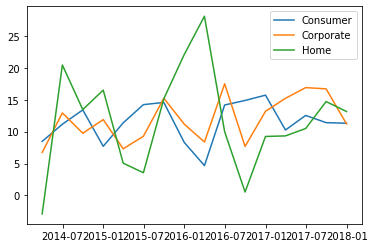

In [25]:
consumer_agg_margins = (consumer_agg_sales_byQ["Profit"]/consumer_agg_sales_byQ["Sales"])*100
corporate_agg_margins = (corporate_agg_sales_byQ["Profit"]/corporate_agg_sales_byQ["Sales"])*100
home_agg_margins = (home_agg_sales_byQ["Profit"]/home_agg_sales_byQ["Sales"])*100

consumer_agg_sales_byQ["Margins"] = consumer_agg_margins
corporate_agg_sales_byQ["Margins"] = corporate_agg_margins
home_agg_sales_byQ["Margins"] = home_agg_margins

plt.plot(consumer_agg_sales_byQ["Margins"])
plt.plot(corporate_agg_sales_byQ["Margins"])
plt.plot(home_agg_sales_byQ["Margins"])
plt.legend(["Consumer", "Corporate", "Home"])
plt.show()

In [26]:
consumer_agg_sales_byQ.to_csv(r'consumer_margins_byQ.csv')
corporate_agg_sales_byQ.to_csv(r'corporate_margins_byQ.csv')
home_agg_sales_byQ.to_csv(r'home_margins_byQ.csv')

In [50]:
#Now analyzing item type

df_bySubCat = df.groupby(df["Sub-Category"])
sub_types = df["Sub-Category"].unique()
sales_count = []
profit_count = []
margins = []

for item in sub_types:
    sales_count.append(df_bySubCat.get_group(item)["Sales"].median())
    profit_count.append(df_bySubCat.get_group(item)["Profit"].median())
    margins.append((df_bySubCat.get_group(item)["Profit"].median())/(df_bySubCat.get_group(item)["Sales"].median()))

sub_type_df = pd.DataFrame({
    "Item Types": sub_types,
    "Sales Median": sales_count,
    "Profit Median": profit_count,
    "Margins": margins
})

sub_type_df




,Item Types,Sales Median,Profit Median,Margins
0,Paper,26.72000,11.54320,0.432006
1,Labels,14.94000,6.87140,0.459933
2,Storage,113.92800,7.75700,0.068087
3,Binders,18.56000,3.97710,0.214283
4,Art,15.50400,3.72360,0.240170
5,Chairs,362.13600,13.31760,0.036775
6,Phones,209.97000,23.52480,0.112039
7,Fasteners,10.58400,2.84160,0.268481
8,Furnishings,41.96000,9.10200,0.216921
9,Accessories,100.00000,21.00000,0.210000


In [51]:
sub_type_df.to_csv(r'sub_type_margins.csv')

In [53]:
state_df = pd.DataFrame({
    "Date": df["Order Date"],
    "State": df["State"],
    "Sales": df["Sales"],
    "Profit": df["Profit"]
})

state_df

,Date,State,Sales,Profit
7980,2014-01-03,Texas,16.448,5.5512
739,2014-01-04,Illinois,11.784,4.2717
740,2014-01-04,Illinois,272.736,-64.7748
741,2014-01-04,Illinois,3.540,-5.4870
1759,2014-01-05,Pennsylvania,19.536,4.8840
...,...,...,...,...
5091,2017-12-30,Colorado,3.024,-0.6048
908,2017-12-30,New York,52.776,19.7910
907,2017-12-30,New York,90.930,2.7279
1296,2017-12-30,California,13.904,4.5188
